In [25]:
# importing functions for analysis
# I find I have to run this cell twice to get nice, large plots
from functions import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
# loading the data sets

# main detector
data_dict, norm_dict = load_all_main()

In [27]:
# monitor detector
monitor_data = load_monitor()

In [28]:
# 2 second proton beam current
p_beam_2s = load_p_beam_2s()

In [29]:
# 10 second proton beam current
p_beam_10s = load_p_beam_10s()

# Proton Beam Current Data

Here are some notes onthe proton beam current data from Bernhard Lauss:

>1) you find files monitoring proton beam data in the relevant time period.<br/>
Note:  file Dec 9 contains all data from Dec 8<br/>
you will receive a file link to download these files

>relevant for you are the following columns<br/>
2RGQ00CE004      this is the proton beam current which you can use for monitoring<br/>
this detector measures the proton beam current at the exit of the cyclotron

>2RGQ00CE006   -  this is the proton beam current towards UCN - you can see when pulses appeared<br/>
but you cannot trust the absolute value for various reasons - so do notu se as monitoring detector

these notes describe the 10 second period data. 

For the 2 second period data, we have data that is only of the latter type, _current towards UCN_. 

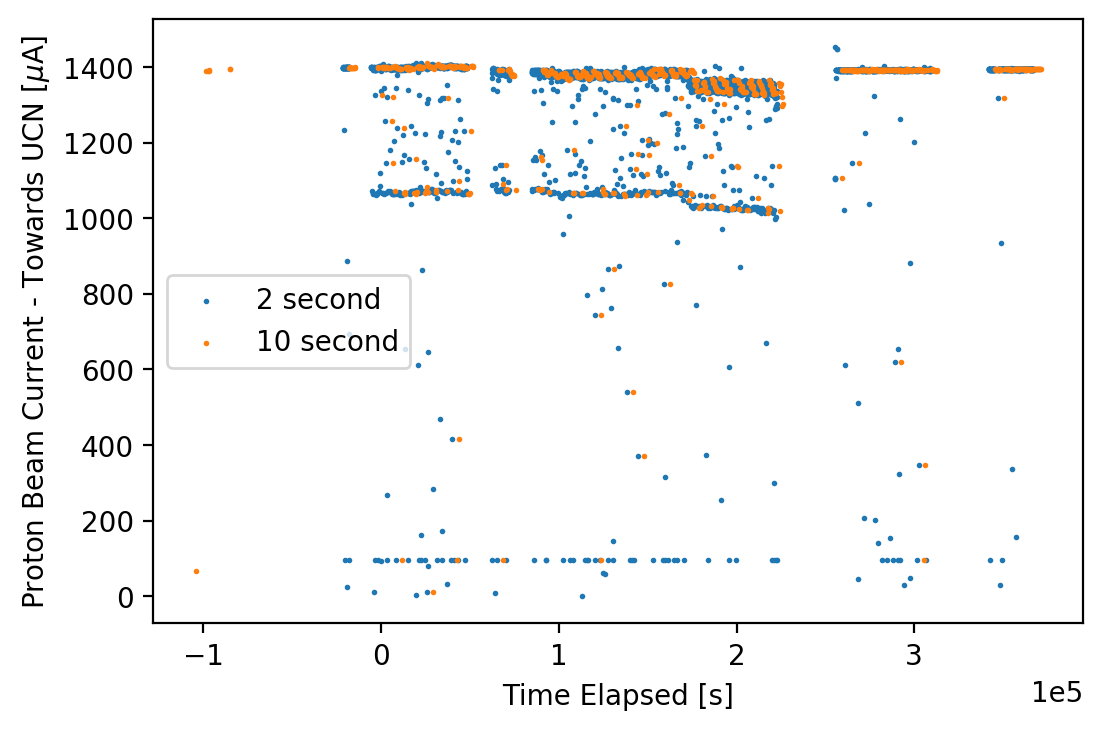

In [30]:
plt.scatter(p_beam_2s[:,0], p_beam_2s[:,1], s=1, label = '2 second');
plt.scatter(p_beam_10s[:,0], p_beam_10s[:,2], s=1, label = '10 second');
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel('Time Elapsed [s]');
plt.ylabel(r'Proton Beam Current - Towards UCN [$\mu$A]');
plt.legend();

Here I've plotted the 2 second data, and the 2RGQ00CE006 column of the 10 second data. The fact that the data are slightly different is probably attributable to the difference in collection frequency. 

Note that measurements appear before 0 in time, this is because the first measurement of the 2 second data is used as a $t=0$ reference point for all the analysis.

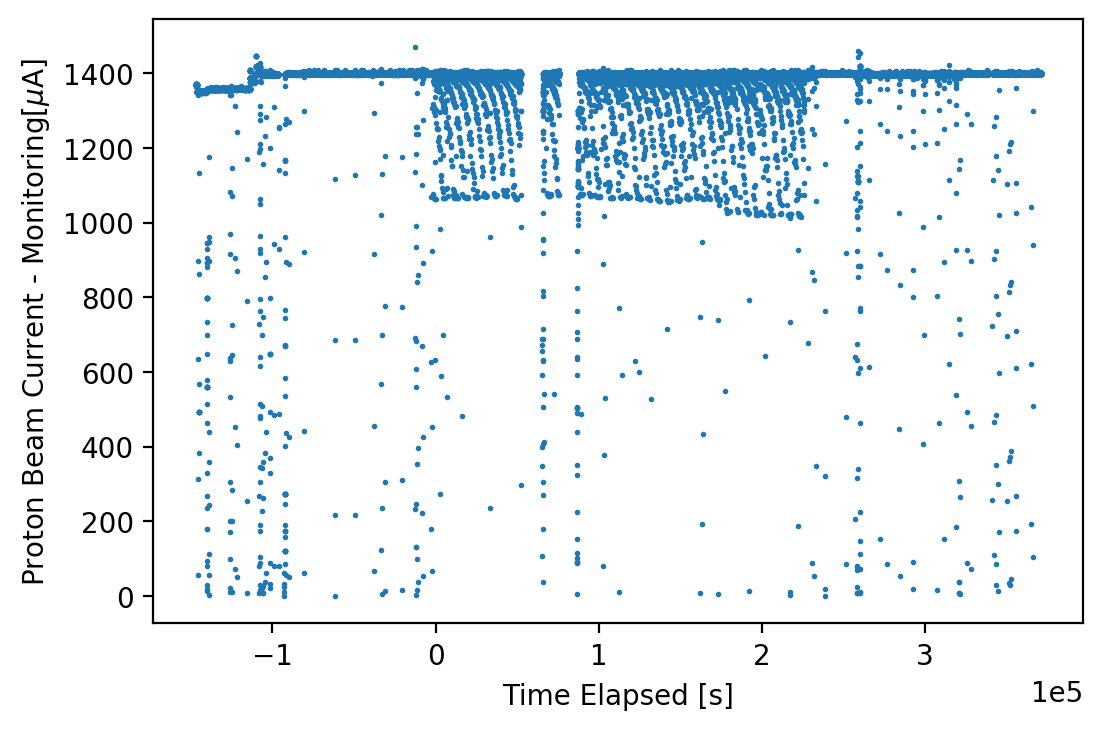

In [31]:
plt.scatter(p_beam_10s[:,0], p_beam_10s[:,1], s=1);
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel('Time Elapsed [s]');
plt.ylabel(r'Proton Beam Current - Monitoring[$\mu$A]');

Here the monitoring data is plotted, column 2RGQ00CE004. We can see some of the cyclotron outtages that were mentioned in the elog. The strange pattern of fluctuating measurements between 1400 and 1000 $\mu$A can be explained by another remark from Bernhard:

>The 4th value s typically lower, because the Proton current <br/>
is ramped down in the last (8th) second.

# Timing Offset

There is a timing offset in the data, between the proton beam current measurement time stamps, and the run start times from the detector files.

For example, the 48th run on the 8th of December; the elog entry:

>[Fri, Dec 08, 2017, 19:08:42 ]  open shutter 1, in order to get 1 measurement with no storage. <br/>
tof.48 = 2872300

The timing information from the txt file:

>Start Time   : 19:10:58<br/>
Nominal Time : 23:50:50<br/>
Real Time    : 00:04:59<br/>
Stop Time    : 19:15:58<br/>

And the proton beam current measurements from 2 second period data set:

2017-12-08 19:06:16 --- 0<br/>
2017-12-08 19:06:18 --- 0<br/>
2017-12-08 19:06:20 --- 0<br/>
2017-12-08 19:06:22 --- 1395.4<br/>
2017-12-08 19:06:24 --- 1394.7<br/>
2017-12-08 19:06:26 --- 1397.4<br/>
2017-12-08 19:06:28 --- 1398.7<br/>
2017-12-08 19:06:30 --- 0<br/>
2017-12-08 19:06:32 --- 0<br/>
2017-12-08 19:06:34 --- 0<br/>
.<br/>
.<br/>
.<br/>
2017-12-08 19:11:18 --- 0<br/>
2017-12-08 19:11:20 --- 0<br/>
2017-12-08 19:11:22 --- 0<br/>
2017-12-08 19:11:24 --- 1393.6<br/>
2017-12-08 19:11:26 --- 1397<br/>
2017-12-08 19:11:28 --- 1398.7<br/>
2017-12-08 19:11:30 --- 1063.5<br/>
2017-12-08 19:11:32 --- 0<br/>
2017-12-08 19:11:34 --- 0<br/>
2017-12-08 19:11:36 --- 0<br/>
.<br/>
.<br/>
.

Every single time in this data set must be off sync. In the 10 second period data the nearest measurement is at 19:11:23, and it looks like this data lines up with the 2 second data, in time.

Let's see if it is a consistent offset. This measurement appears to be off by ~26 seconds, that is, the proton beam current times stamp is ~26 seconds later than it should be. 


Here's run 198 on Dec. 09:

>[Sat, Dec 09, 2017, 23:50:59 ] UGD01 installed, ready to get measurement in direct. Open shutter 1, in order to get 1 measurement with no storage.<br/>
tof.198 = 2942550

From the txt:

>Start Time   : 23:53:21<br/>
Nominal Time : 23:50:50<br/>
Real Time    : 00:04:59<br/>
Stop Time    : 23:58:20<br/>


Then from the beam current data:
>.<br/>
.<br/>
.<br/>
2017-12-09 23:53:42 --- 0<br/>
2017-12-09 23:53:44 --- 0<br/>
2017-12-09 23:53:46 --- 0<br/>
2017-12-09 23:53:48 --- 1376.7<br/>
2017-12-09 23:53:50 --- 1383.1<br/>
2017-12-09 23:53:52 --- 1387.1<br/>
2017-12-09 23:53:54 --- 1064.9<br/>
2017-12-09 23:53:56 --- 0<br/>
2017-12-09 23:53:58 --- 0<br/>
2017-12-09 23:54:00 --- 0<br/>
2017-12-09 23:54:02 --- 0<br/>
.<br/>
.<br/>
.

Which amounts to a lateness of ~27 s. This seems like a consistent offset. However, because the runs were consistently periodic, we can't be sure exactly which run matches up with which proton beam current measurement. The measurements could be 27 seconds off, but they could also be $n \cdot 5 \, \mathrm{min} + 26 \, \mathrm{sec}$ off

# Trying to Determine the Offset

It might be possible to pin specific runs to specific beam current measurements by looking at the regions where the cyclotron outtages occurred.

We can look at the following section of the elog:

>[Sat, Dec 09, 2017, 20:05:40 ]  storage 5 s <br/>
tof.157 = 70610<br/>
tof.158 = 71058<br/>
tof.159 = 70822<br/>
[Sat, Dec 09, 2017, 20:23:47 ]  prepare to break vacuum in order to install the two flanges (normally connected to TRIUMF guides) in order to perform a normalization measurement.<br/>
[Sat, Dec 09, 2017, 21:19:39 ]  two flanges installed (tapped and clamped...), ready to get measurement in direct. Open shutter 1, in order to get 1 measurement with no storage.<br/>
[Sat, Dec 09, 2017, 21:23:39 ] beam stopped. Pretty annoying... Close shutter 1 for the moment, in order to avoid possible vacuum problem.<br/>
[Sat, Dec 09, 2017, 21:58:48 ]  seems the cyclotron can deliver a stable beam again. Open shutter 1, in order to get 1 measurement with no storage.<br/>
tof.175 = 3218500

below I've plotted the time of flight data for the runs in this range

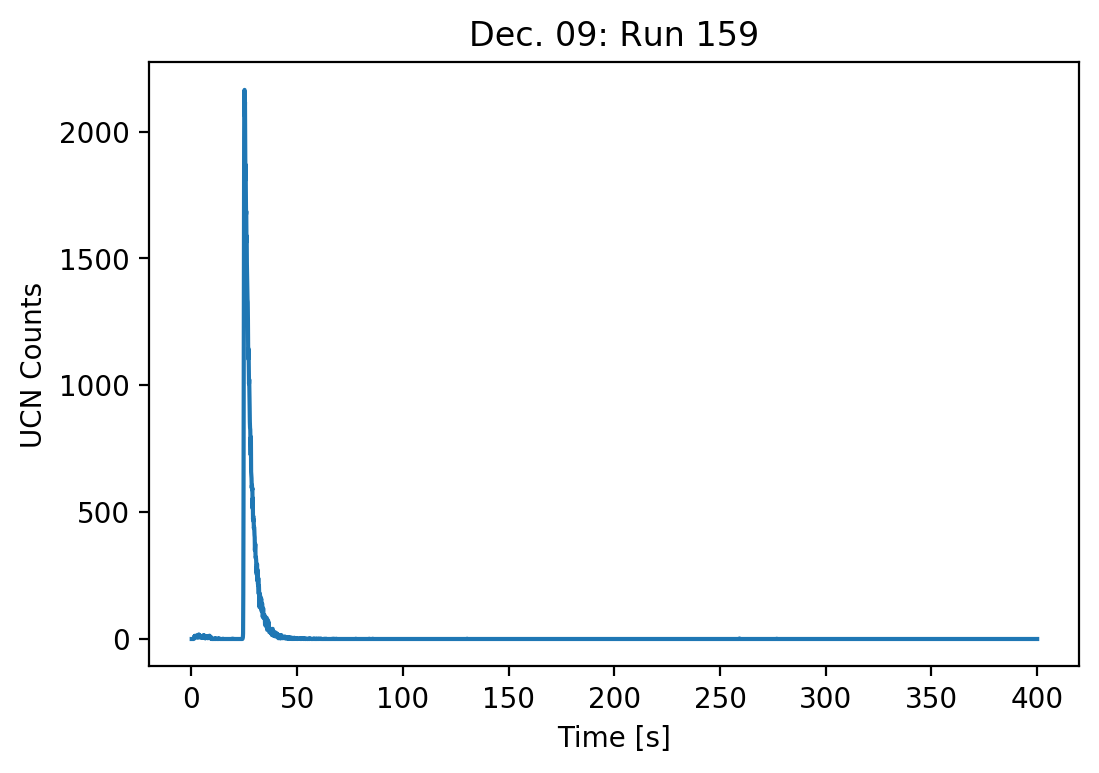

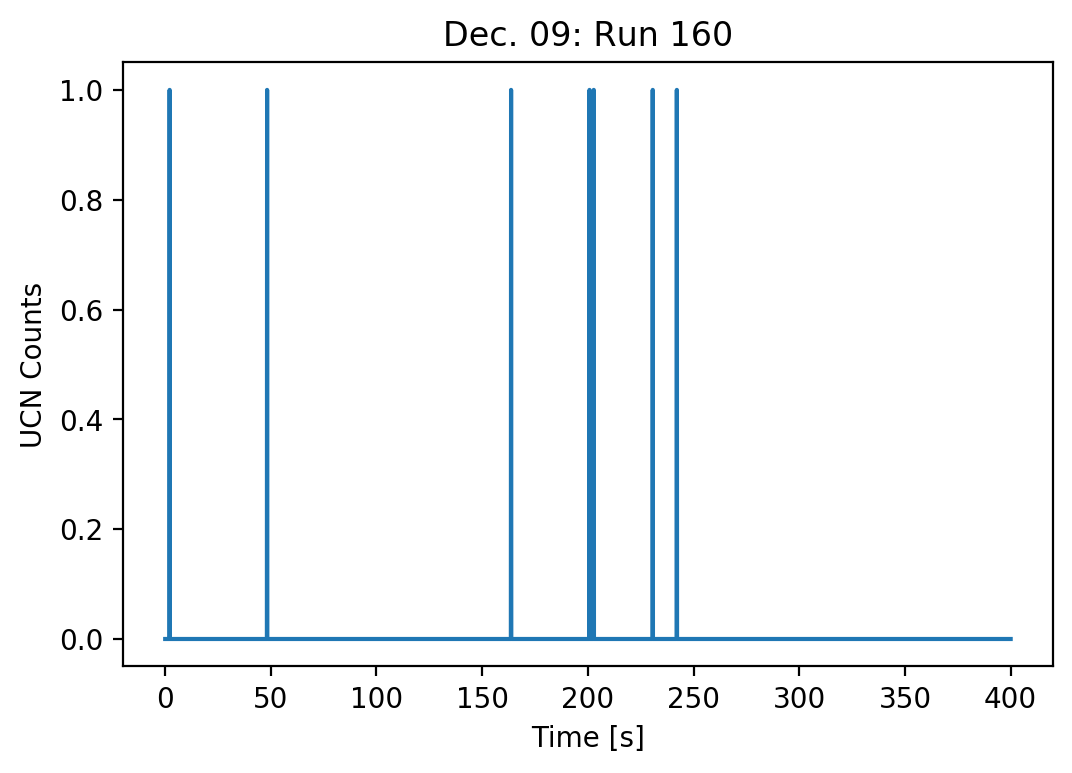

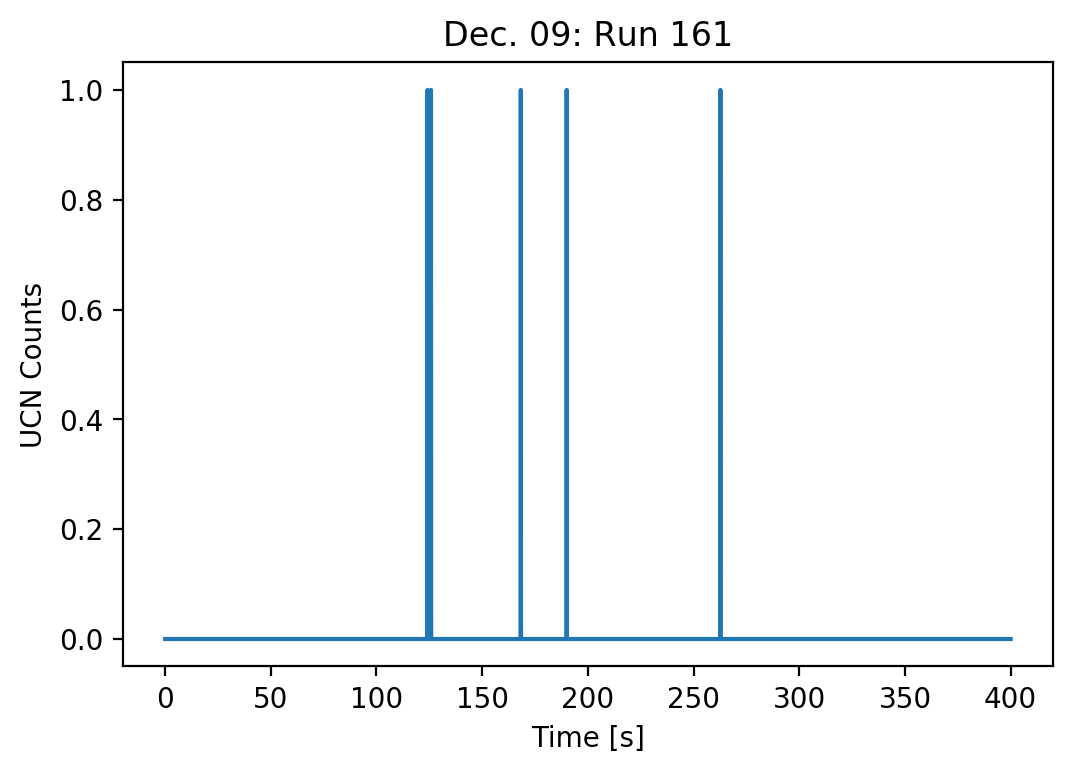

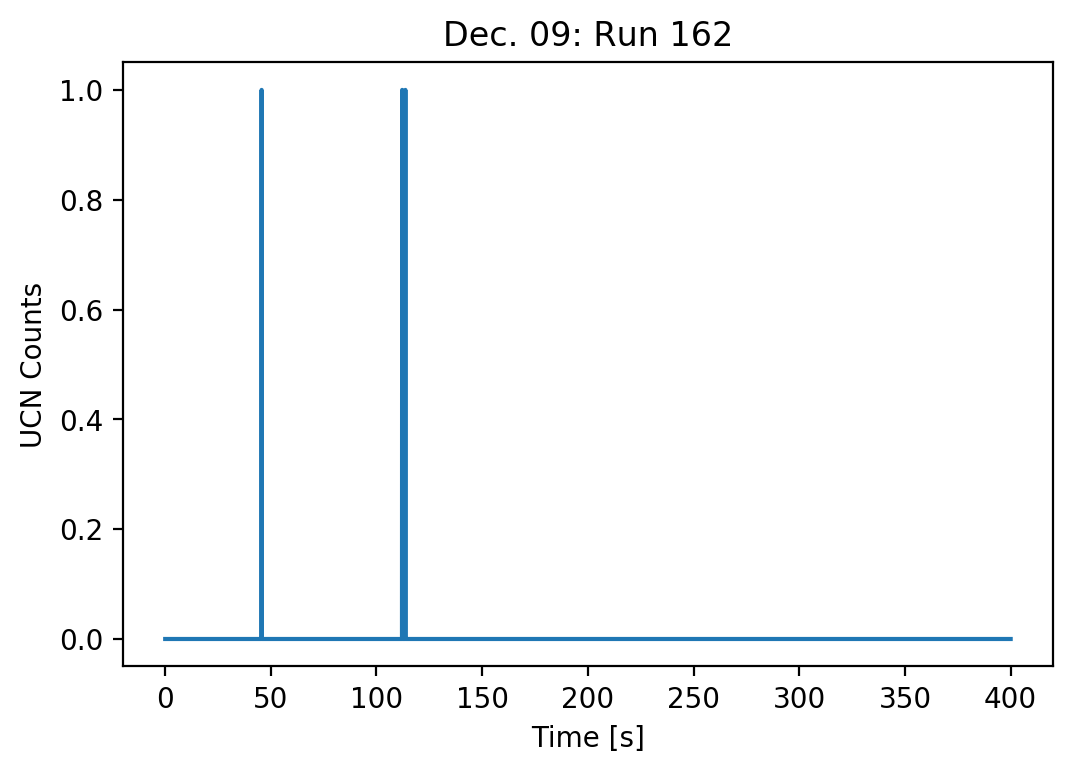

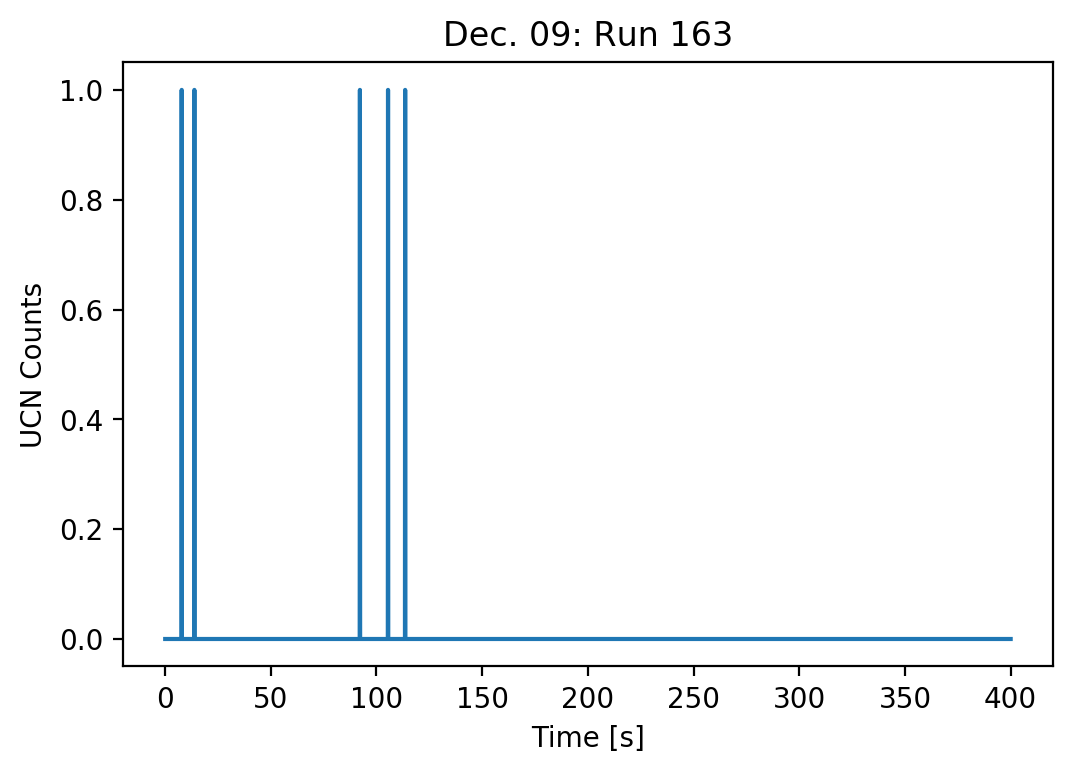

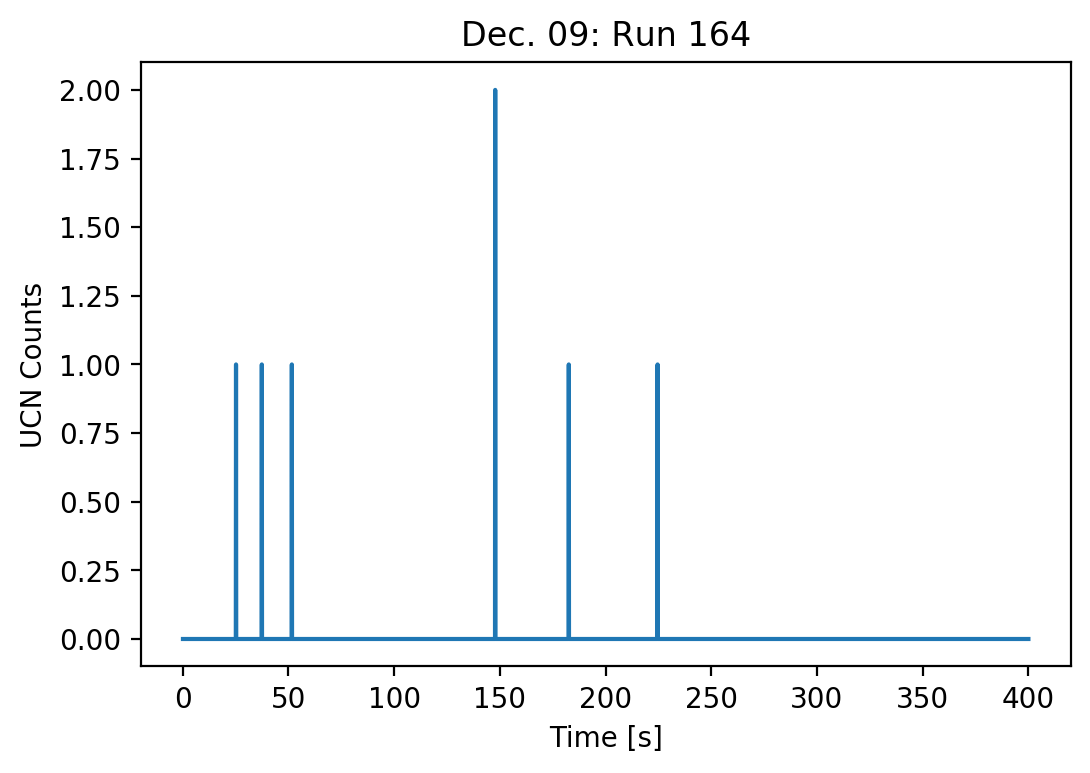

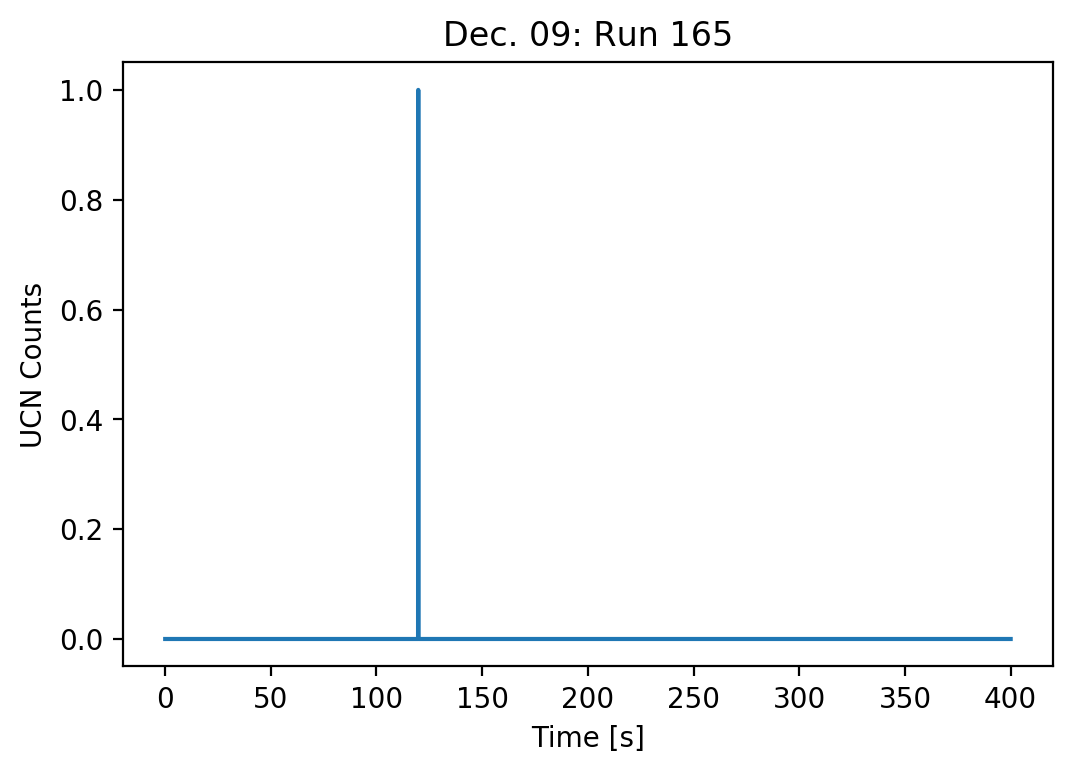

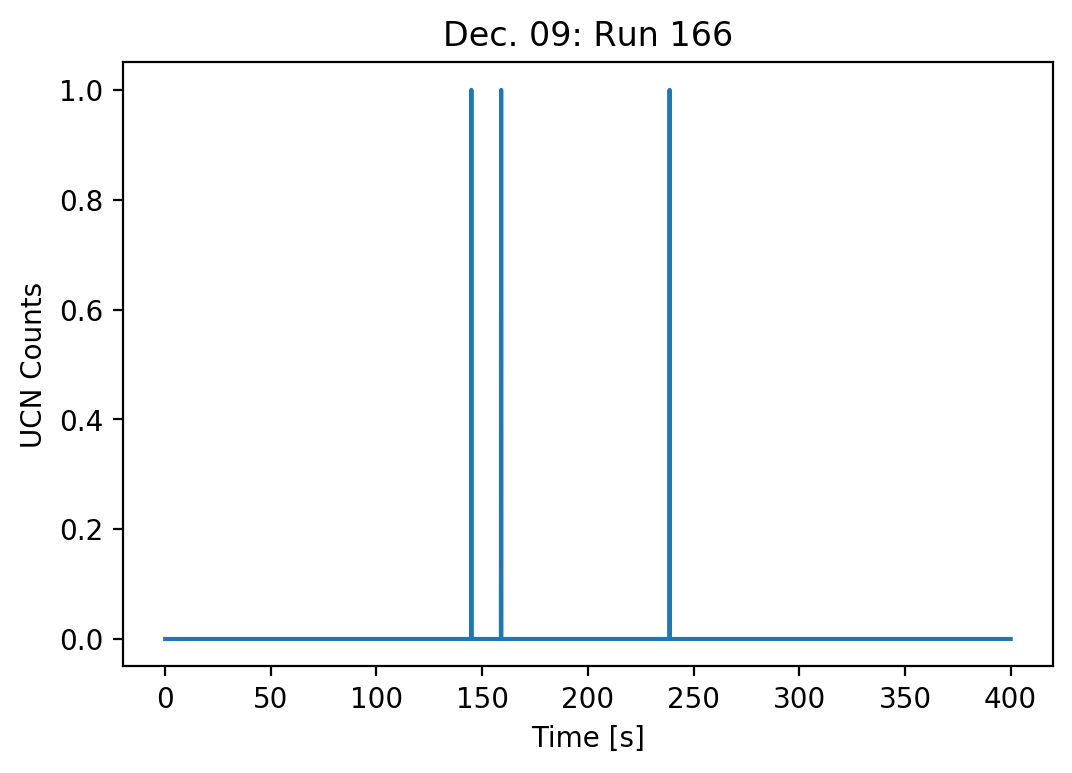

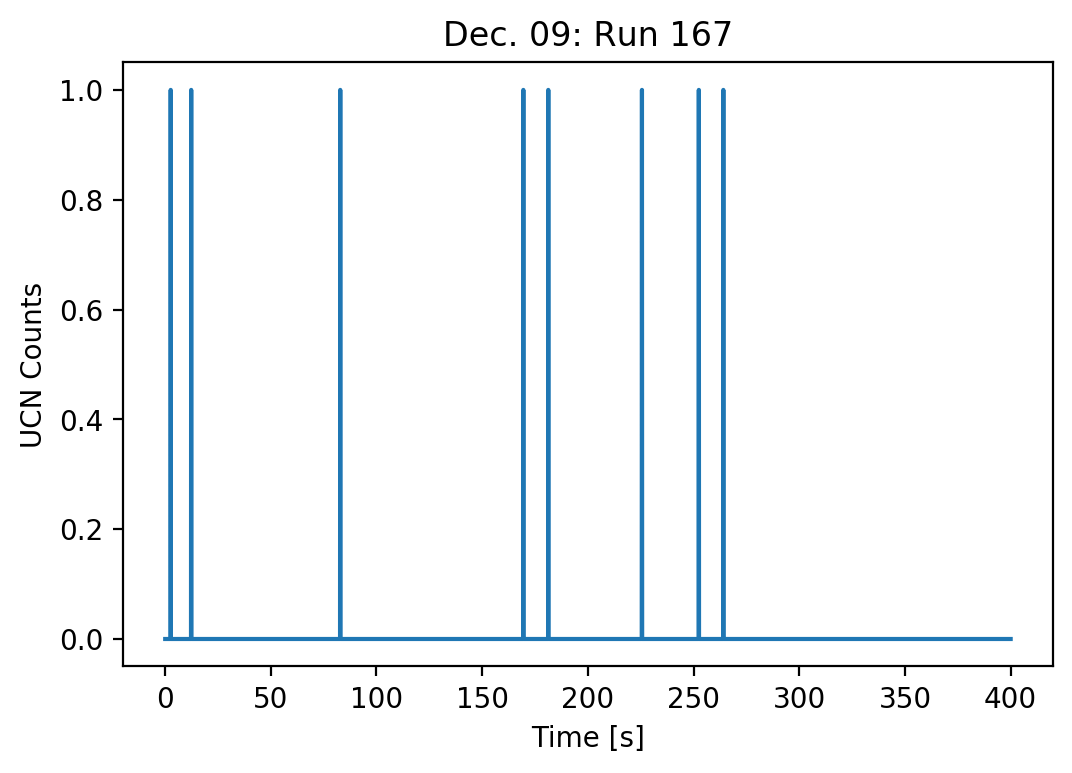

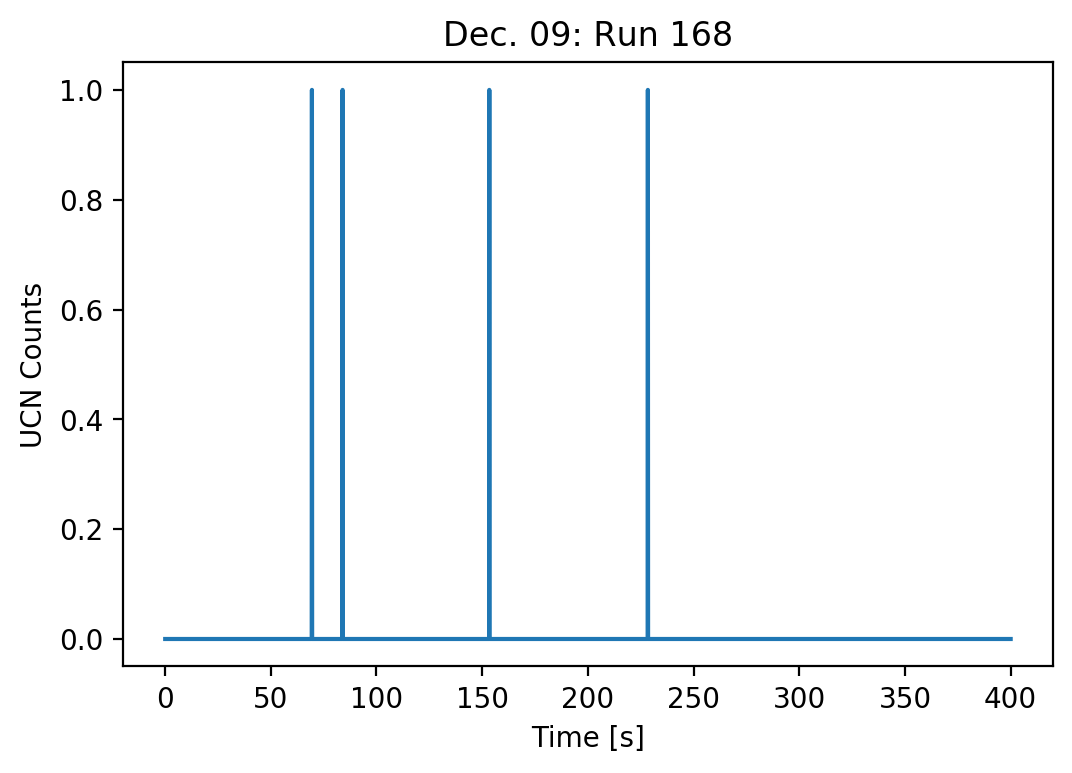

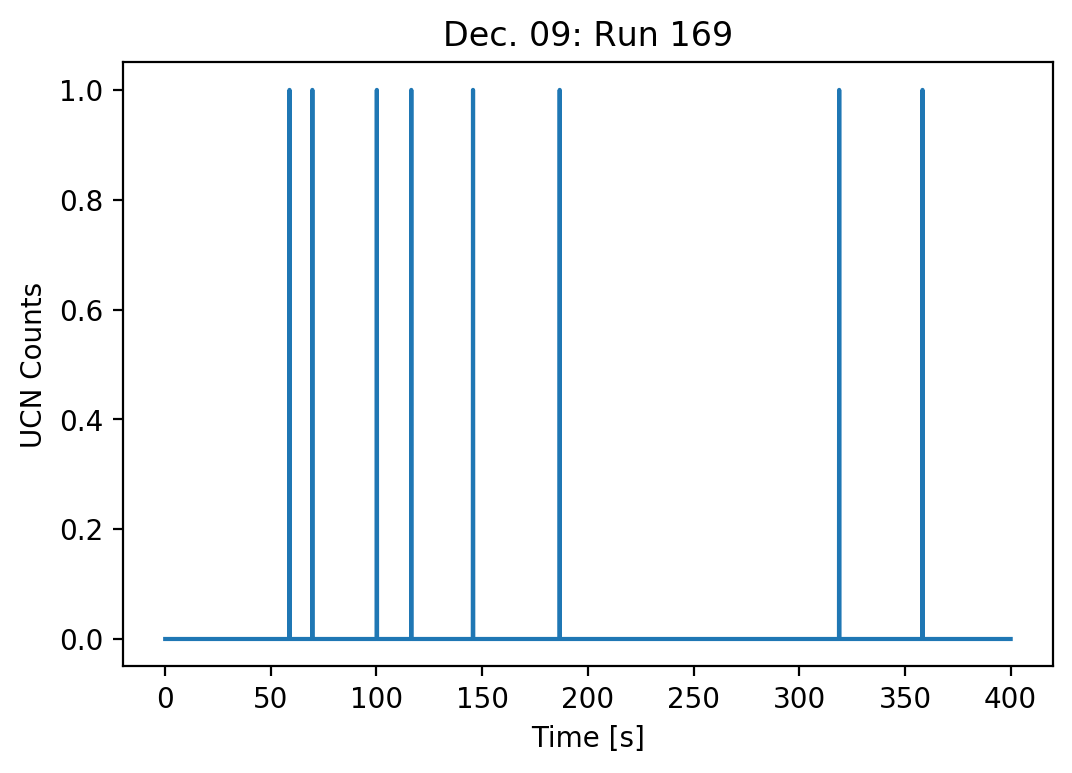

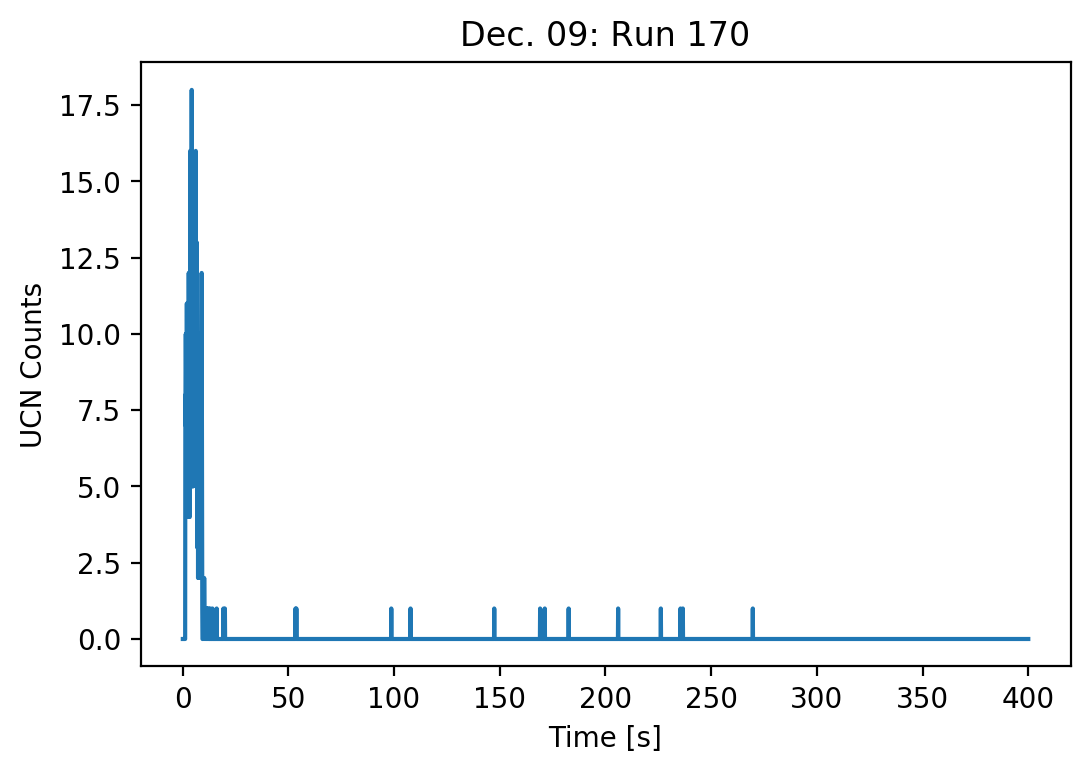

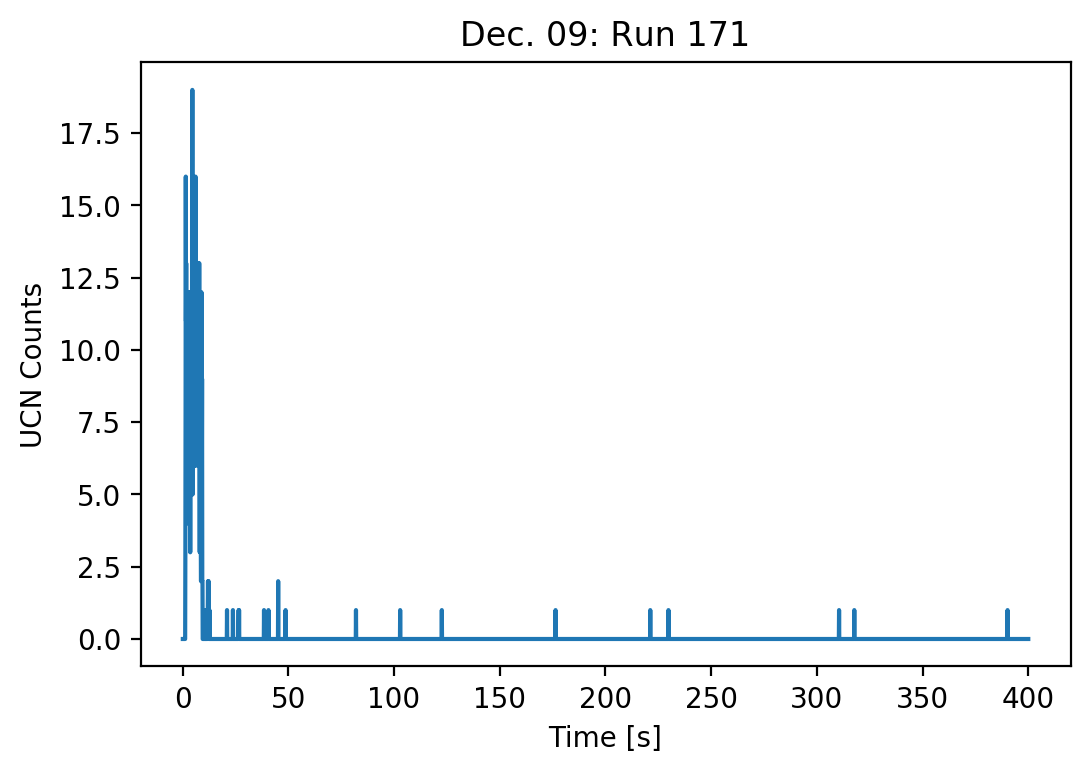

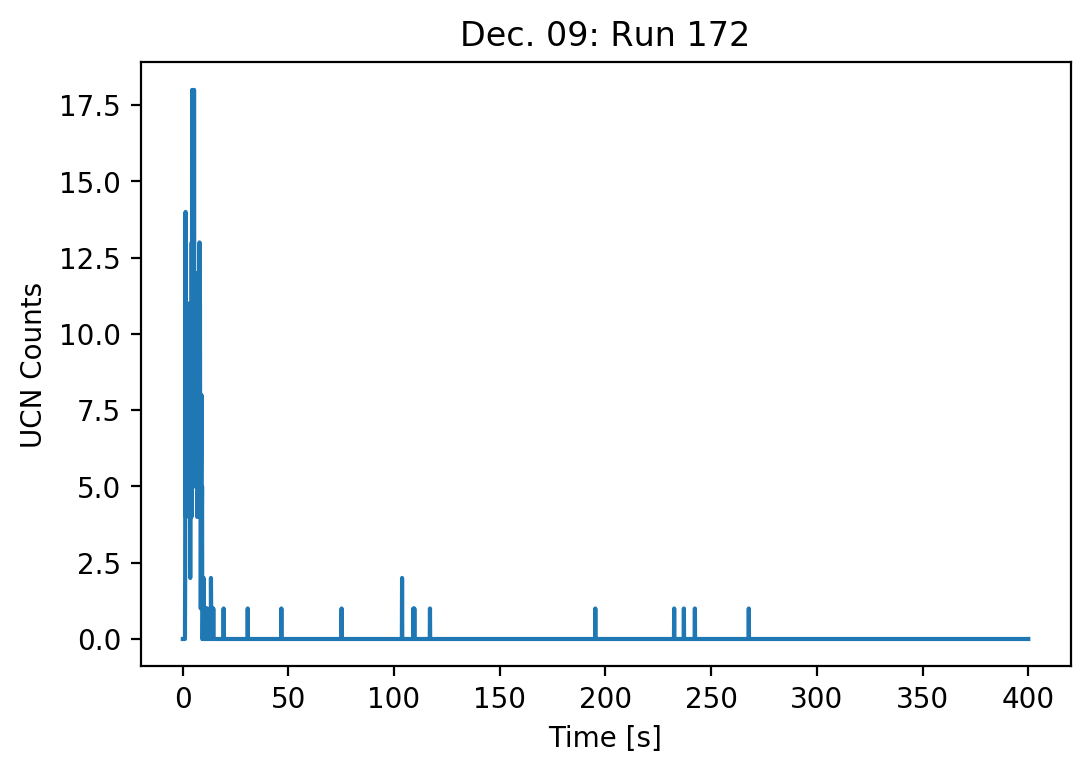

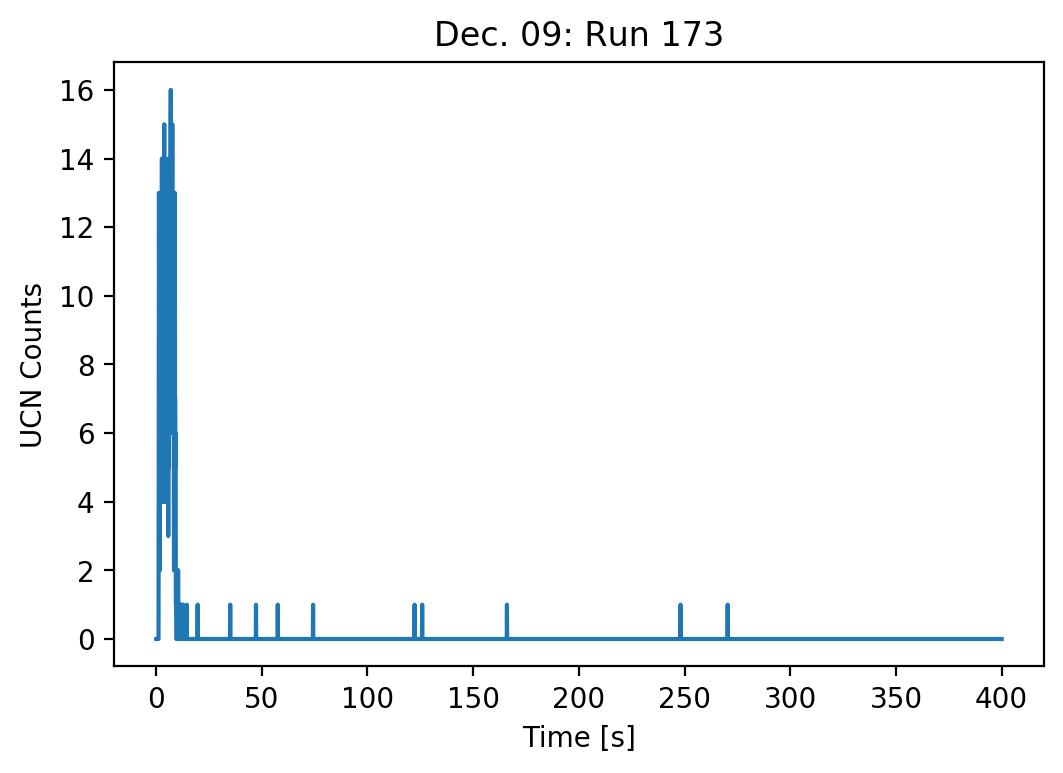

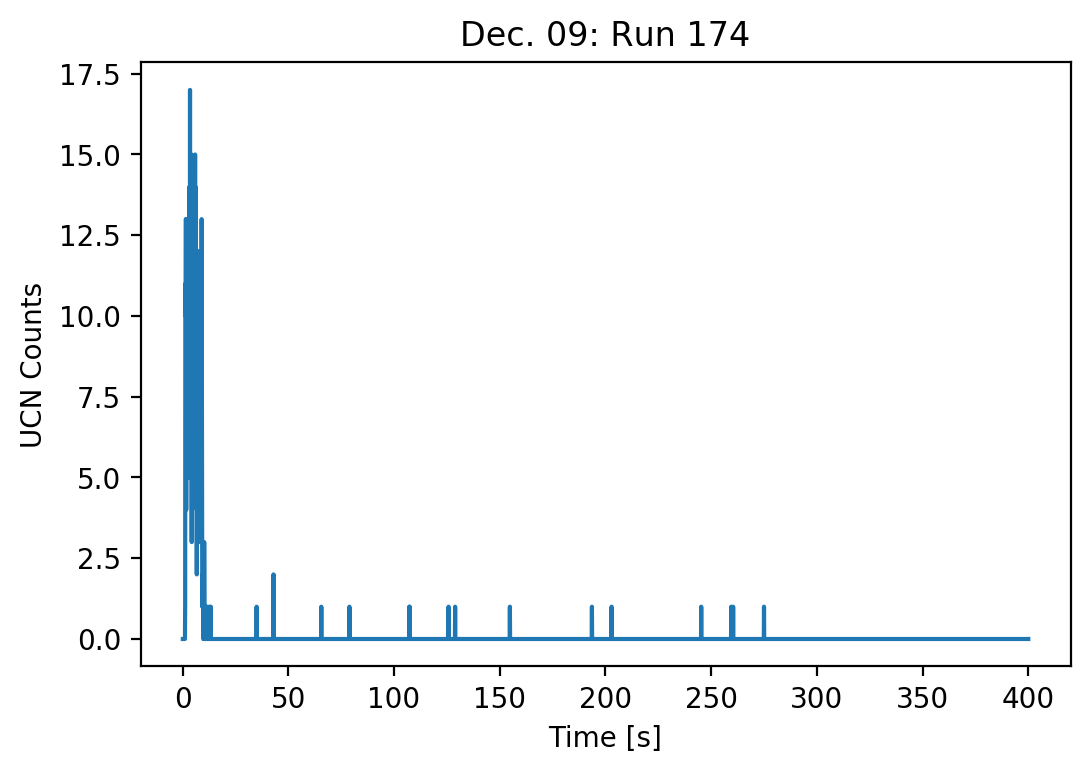

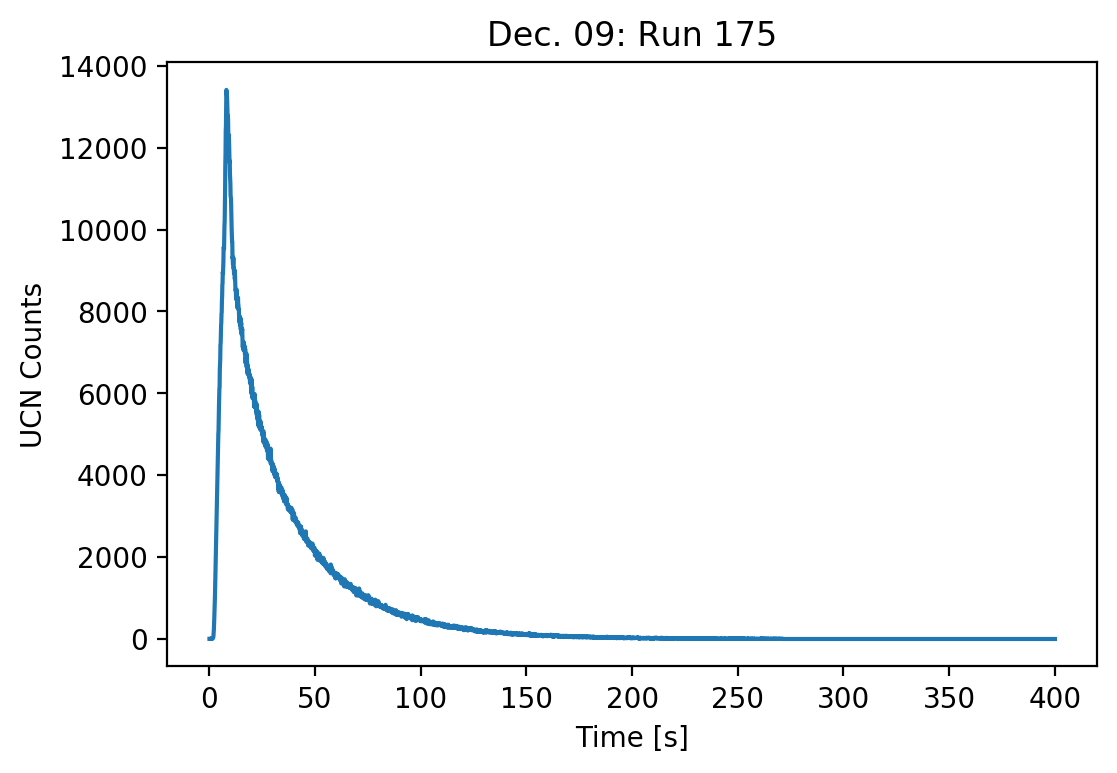

In [32]:
for i in range(159, 176): 

    data = np.loadtxt("../data_ucn/main_detector/9/T091217_" + str(i).zfill(4) + ".tof", usecols = (0,1));
    plt.plot(data[:,0] * 0.1, data[:,1]);
    plt.xlabel('Time [s]');
    plt.ylabel('UCN Counts');
    plt.title('Dec. 09: Run ' + str(i))
    plt.show()

The beam is gone for run 160, comes back for 175. Something definitely changes between 169 and 170 though, perhaps some valve business from the experimenters?

Run 160 has timing information:

>Start Time   : 20:23:00<br/>
Nominal Time : 23:50:50<br/>
Real Time    : 00:05:01<br/>
Stop Time    : 20:28:01<br/>

Proton beam current measurements:

>.<br/>
.<br/>
.<br/>
2017-12-09 20:08:24 --- 0<br/>
2017-12-09 20:08:26 --- 0<br/>
2017-12-09 20:08:28 --- 0<br/>
2017-12-09 20:08:30 --- 1377.4<br/>
2017-12-09 20:08:32 --- 1382<br/>
2017-12-09 20:08:34 --- 1386.9<br/>
2017-12-09 20:08:36 --- 1100.3<br/>
2017-12-09 20:08:38 --- 0<br/>
2017-12-09 20:08:40 --- 0<br/>
2017-12-09 20:08:42 --- 0<br/>
.<br/>
.<br/>
.<br/>
2017-12-09 20:28:22 --- 0<br/>
2017-12-09 20:28:24 --- 0<br/>
2017-12-09 20:28:26 --- 0<br/>
2017-12-09 20:28:28 --- 1361.9<br/>
2017-12-09 20:28:30 --- 1369.1<br/>
2017-12-09 20:28:32 --- 1377.6<br/>
2017-12-09 20:28:34 --- 1336.6<br/>
2017-12-09 20:28:36 --- 0<br/>
2017-12-09 20:28:38 --- 0<br/>
2017-12-09 20:28:40 --- 0<br/>
.<br/>
.<br/>
.

That's almost exactly a 20 minute outtage. Run 159's timing info:

>Start Time   : 20:17:59<br/>
Nominal Time : 23:50:50<br/>
Real Time    : 00:05:00<br/>
Stop Time    : 20:22:59<br/>

Run 170's timing info:

>Start Time   : 21:28:06<br/>
Nominal Time : 23:50:50<br/>
Real Time    : 00:05:00<br/>
Stop Time    : 21:33:06<br/>

Run 175's timing info:

>Start Time   : 21:58:09<br/>
Nominal Time : 23:50:50<br/>
Real Time    : 00:05:00<br/>
Stop Time    : 22:03:10<br/>

Of course these aren't matching because the experimenters would have waited to see the beam was back up before actually opening up to perform a full run. These timings aren't going to yield an exact coincidence. This approach will not work.

## Histogram of all Proton Beam Data

Below a histogram is produced for all the 2 second period proton beam data

In [33]:
# need to remove 'nan' values entirely first
a = np.where(np.isnan(p_beam_2s[:,1]), np.zeros(np.shape(p_beam_2s[:,1])), p_beam_2s[:,1])
a = a[a != 0]
# a = np.histogram(a, bins = 100);

# let's look only at the > 1000 data
b = a[a > 1000]

# let's look at the 10 s data, constant collection
c = np.where(np.isnan(p_beam_10s[:,1]), np.zeros(np.shape(p_beam_10s[:,1])), p_beam_10s[:,1])

# the >1000, 10 s data, constant collection
d = c[c > 1000]

# the data right around 1400, 10 s data, constant collection
e = c[np.abs(c - 1400) < 6]

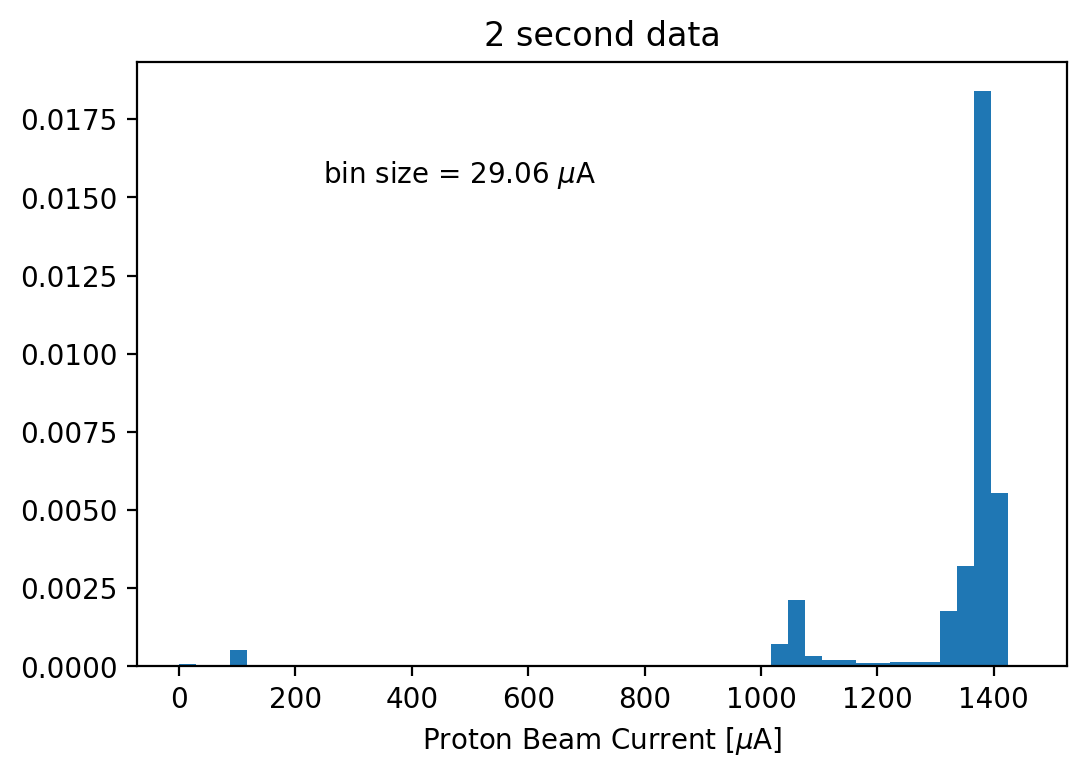

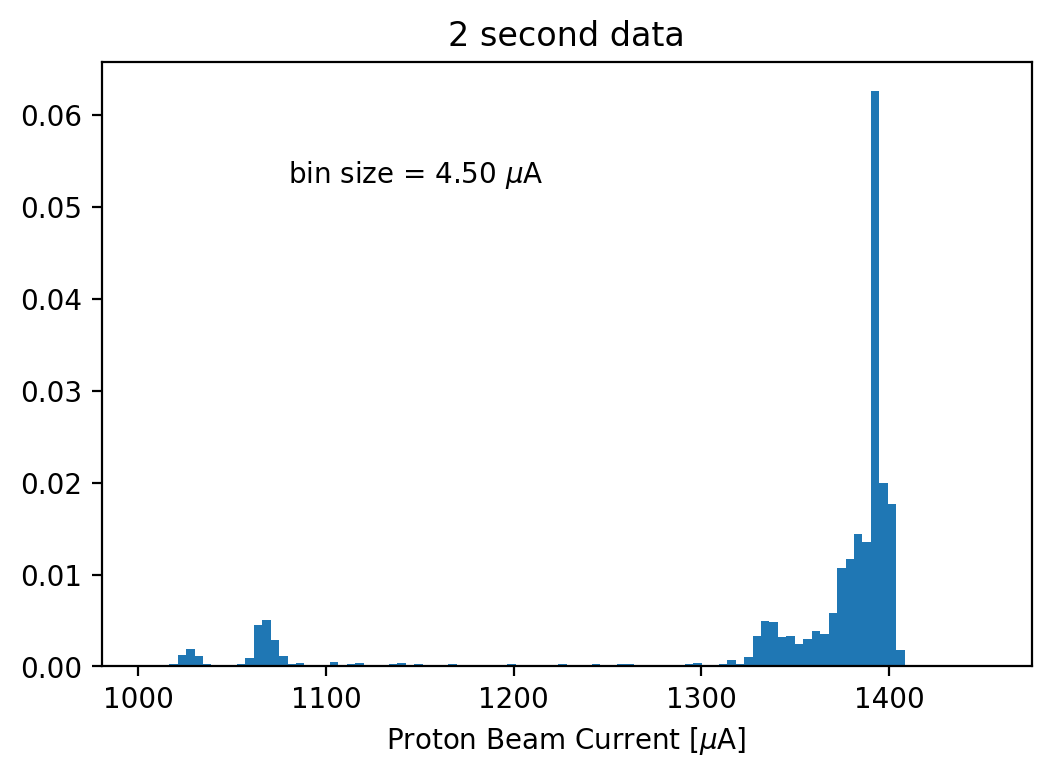

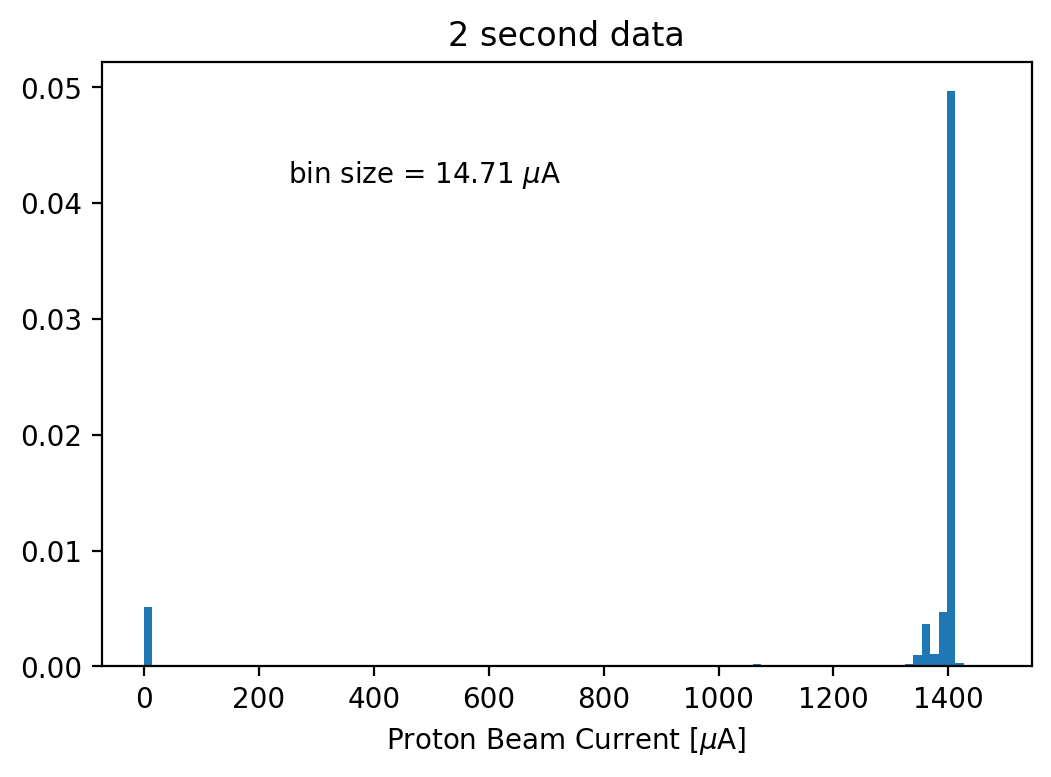

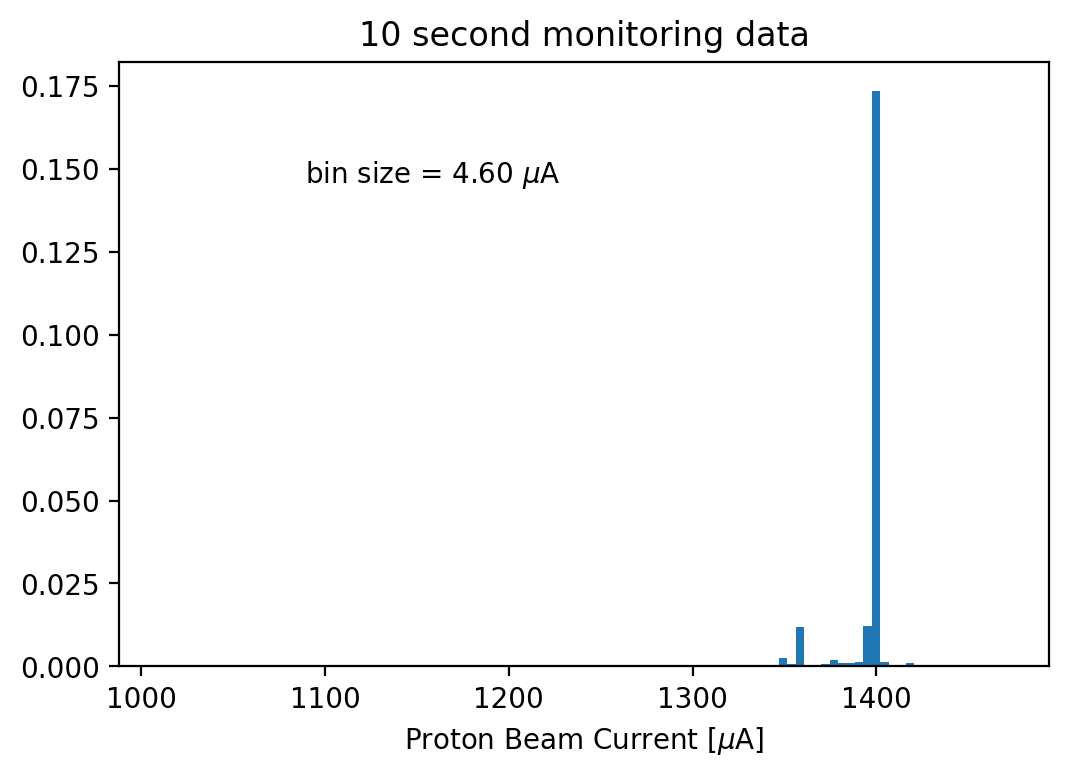

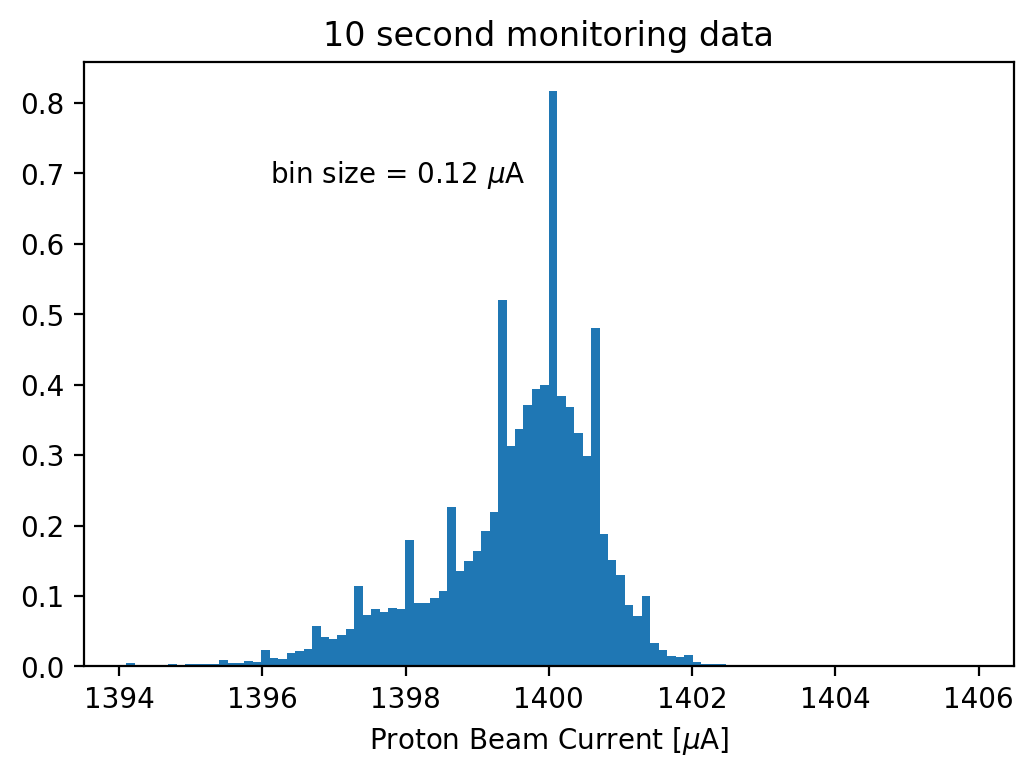

In [34]:
fig, ax = plt.subplots()
n = ax.hist(a, bins = 50, density = True);
ax.set_xlabel(r'Proton Beam Current [$\mu$A]');
ax.text(0.2,0.8,r'bin size = {} $\mu$A'.format(n[1][1] - n[1][0]), transform=ax.transAxes);
ax.set_title('2 second data')

fig_b, ax_b = plt.subplots()
n_b = ax_b.hist(b, bins = 100, density = True);
ax_b.set_xlabel(r'Proton Beam Current [$\mu$A]');
ax_b.text(0.2,0.8,r'bin size = %.2f $\mu$A' % (n_b[1][1] - n_b[1][0]), transform=ax_b.transAxes);
ax_b.set_title('2 second data')

fig_c, ax_c = plt.subplots()
n_c = ax_c.hist(c, bins = 100, density = True);
ax_c.set_xlabel(r'Proton Beam Current [$\mu$A]');
ax_c.text(0.2,0.8,r'bin size = %.2f $\mu$A' % (n_c[1][1] - n_c[1][0]), transform=ax_c.transAxes);
ax_c.set_title('2 second data')

fig_d, ax_d = plt.subplots()
n_d = ax_d.hist(d, bins = 100, density = True);
ax_d.set_xlabel(r'Proton Beam Current [$\mu$A]');
ax_d.text(0.2,0.8,r'bin size = %.2f $\mu$A' % (n_d[1][1] - n_d[1][0]), transform=ax_d.transAxes);
ax_d.set_title('10 second monitoring data')

fig_e, ax_e = plt.subplots()
n_e = ax_e.hist(e, bins = 100, density = True);
ax_e.set_xlabel(r'Proton Beam Current [$\mu$A]');
ax_e.text(0.2,0.8,r'bin size = %.2f $\mu$A' % (n_e[1][1] - n_e[1][0]), transform=ax_e.transAxes);
ax_e.set_title('10 second monitoring data');